In [44]:
import zipfile
import os

# Define the zip path and extraction path
zip_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\individual+household+electric+power+consumption.zip"
extract_to = r"E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data"

# Create target directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ ZIP extracted successfully to:", extract_to)


✅ ZIP extracted successfully to: E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data


# Want to install Packages
pip install pandas numpy matplotlib seaborn
pip install scikit-learn
pip install -U scikit-learn
python -m pip show scikit-learn
pip install xgboost


Data explore

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data\household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';')

display(data.head())

print("Dataset Shape")
print(data.shape)

print("Missing Values")
print(data.isna().sum())



C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_12156\200439531.py:8: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Dataset Shape
(2075259, 9)
Missing Values
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [46]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [47]:
# To change the datatype

import pandas as pd
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in cols_to_convert:
  # Using errors='coerce' to make non-numeric values as NaN
  data[col] = pd.to_numeric(data[col], errors='coerce')

print("Data types after conversion")
print(data.dtypes)

print("\nMissing Values")
print(data.isna().sum())

Data types after conversion
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Missing Values
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [48]:
# To show all rows that contain at least one missing value
missing_values = data[data.isnull().any(axis=1)]

print(missing_values)


               Date      Time  Global_active_power  Global_reactive_power  \
6839     21/12/2006  11:23:00                  NaN                    NaN   
6840     21/12/2006  11:24:00                  NaN                    NaN   
19724    30/12/2006  10:08:00                  NaN                    NaN   
19725    30/12/2006  10:09:00                  NaN                    NaN   
41832     14/1/2007  18:36:00                  NaN                    NaN   
...             ...       ...                  ...                    ...   
1990185   28/9/2010  19:09:00                  NaN                    NaN   
1990186   28/9/2010  19:10:00                  NaN                    NaN   
1990187   28/9/2010  19:11:00                  NaN                    NaN   
1990188   28/9/2010  19:12:00                  NaN                    NaN   
2027411  24/10/2010  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839 

In [49]:
# Drop
data.dropna(inplace=True)
print(data.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [50]:
# Shape
print("Dataset Shape")
data.shape

Dataset Shape


(2049280, 9)

In [51]:
display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [52]:
# Combine 'Date' and 'Time' into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Set the new Datetime column as the index
data = data.set_index('Datetime')


In [53]:
display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


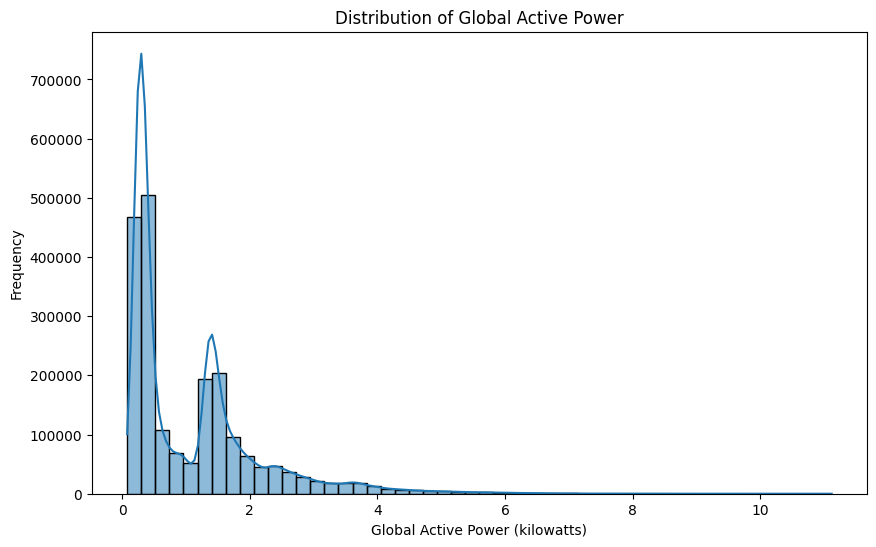

In [54]:
# Global_active_power data distribution from histogram plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

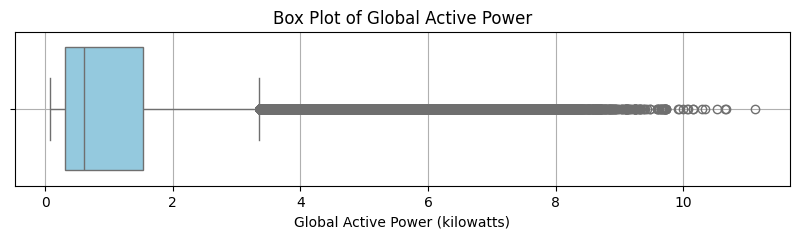

In [55]:
# Plot the boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Global_active_power'], color='skyblue')
plt.title('Box Plot of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

In [56]:
# Check outlayer len data

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Specifing the column here 
column = ['Global_active_power']

print("\nOutlier Detection")

for col in column:
  if col in data.columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"\nNumber of outliers in '{col}': {len(outliers)}")
  else:
    print(f"'{col}' Column not found")


Outlier Detection

Number of outliers in 'Global_active_power': 94907


In [57]:
# Removing Outlayers
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove rows where target is an outlier
data = data[(data['Global_active_power'] >= lower) & (data['Global_active_power'] <= upper)]
print("After removing outliers:", data.shape)


After removing outliers: (1954373, 9)


Create Time-Based Features

In [58]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['weekday'] = data.index.weekday
data['month'] = data.index.month
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
data['is_peak_hour'] = data['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)  # 6 PM to 10 PM


In [59]:
# Daily average power consumption (target)
data['daily_avg_power'] = data['Global_active_power'].resample('D').transform('mean')


In [60]:
data['power_rolling_3h'] = data['Global_active_power'].rolling(window=3).mean()
data['power_rolling_6h'] = data['Global_active_power'].rolling(window=6).mean()
data['power_rolling_1d'] = data['Global_active_power'].rolling(window=24).mean()


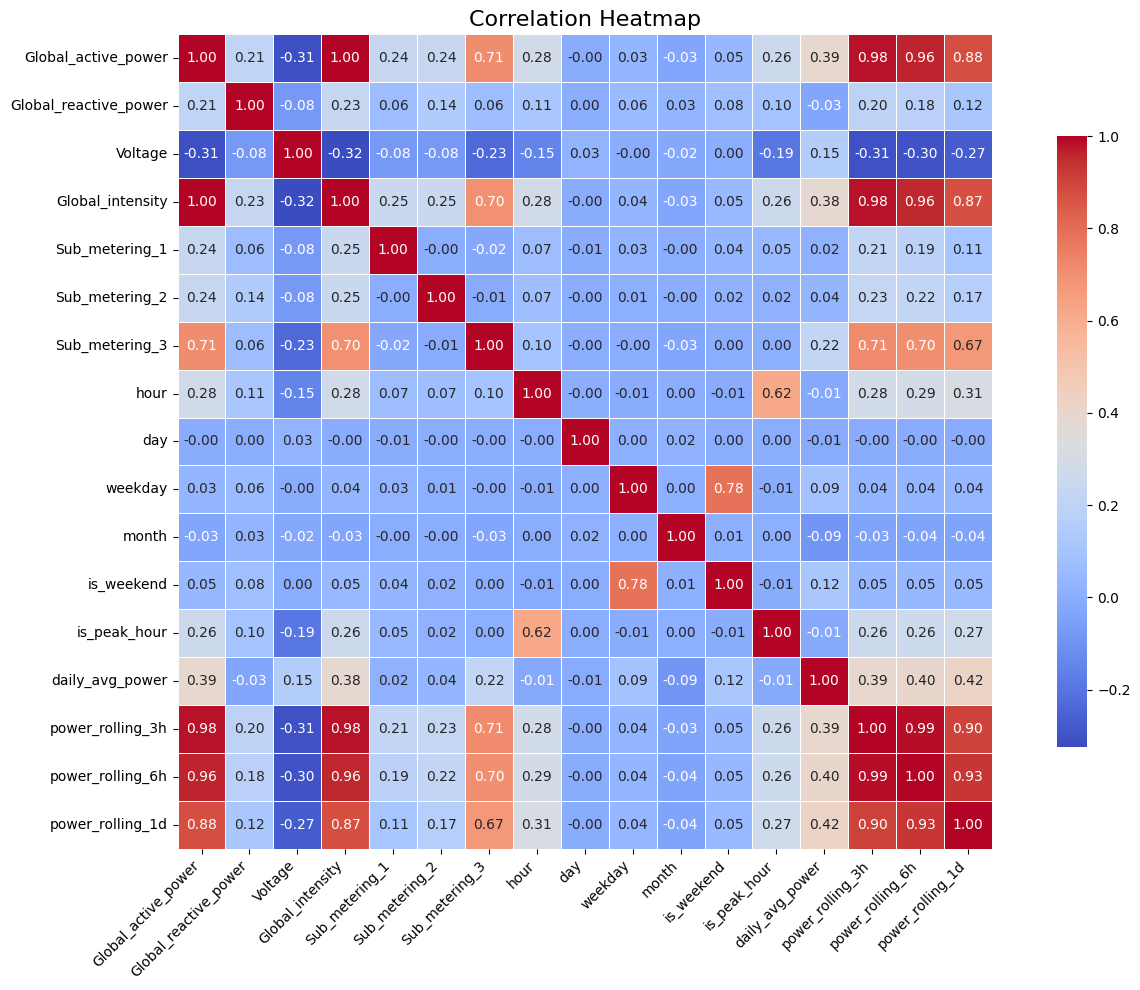

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Date' and 'Time' just for correlation calculation
heatmap_data = data.drop(columns=['Date', 'Time'], errors='ignore')

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data.corr(), 
    annot=True, fmt='.2f', cmap='coolwarm', 
    square=True, linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [62]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day', 'weekday', 'month', 'is_weekend',
       'is_peak_hour', 'daily_avg_power', 'power_rolling_3h',
       'power_rolling_6h', 'power_rolling_1d'],
      dtype='object')

In [63]:
data.shape

(1954373, 19)

In [ ]:
# Just check any null values are there
data.isnull().sum()

Date                      0
Time                      0
Global_active_power       0
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3            0
hour                      0
day                       0
weekday                   0
month                     0
is_weekend                0
is_peak_hour              0
daily_avg_power           0
power_rolling_3h          2
power_rolling_6h          5
power_rolling_1d         23
dtype: int64

In [67]:
data = data.dropna()

In [68]:
data.isnull().sum()


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day                      0
weekday                  0
month                    0
is_weekend               0
is_peak_hour             0
daily_avg_power          0
power_rolling_3h         0
power_rolling_6h         0
power_rolling_1d         0
dtype: int64

In [70]:
data.shape

(1954350, 19)

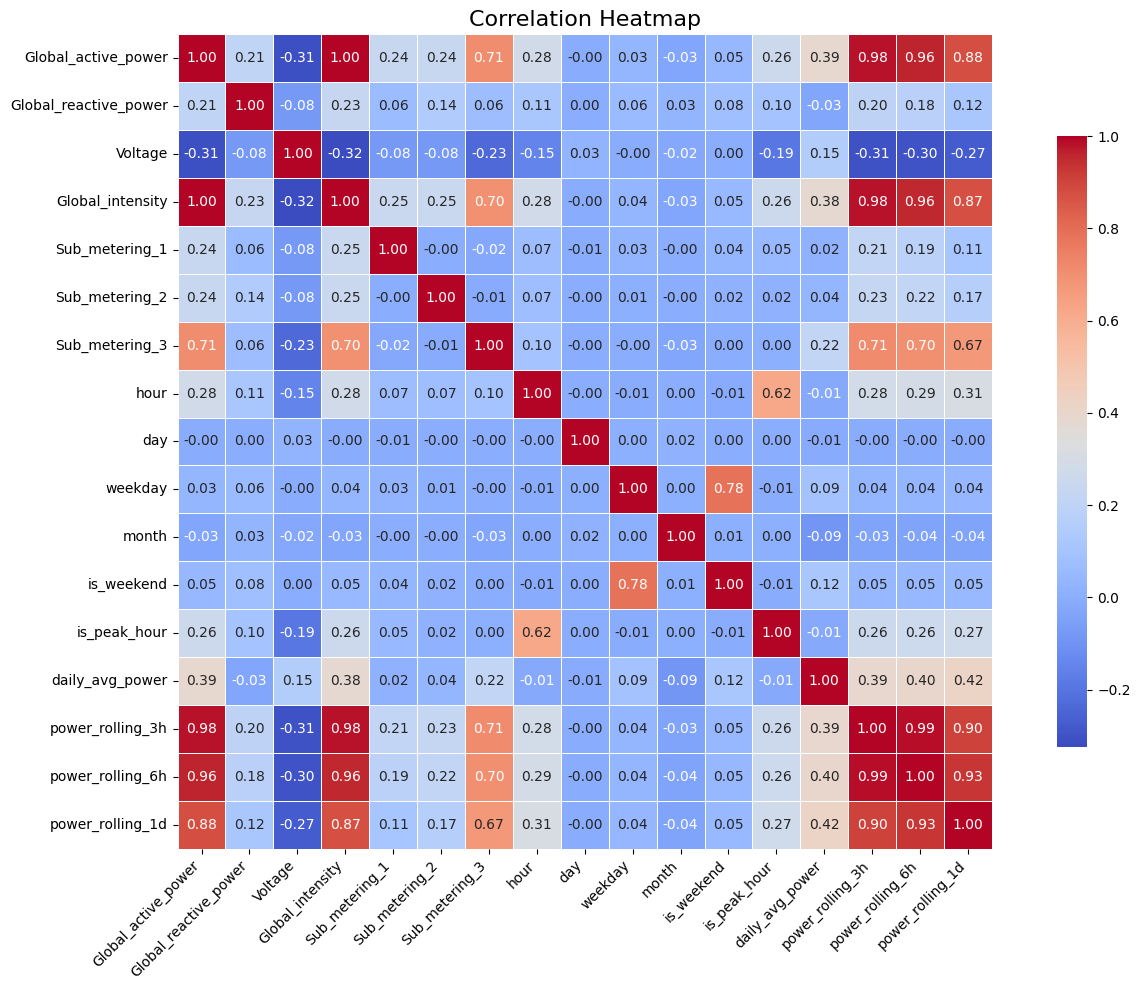

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Date' and 'Time' just for correlation calculation
heatmap_data = data.drop(columns=['Date', 'Time'], errors='ignore')

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data.corr(), 
    annot=True, fmt='.2f', cmap='coolwarm', 
    square=True, linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
# Saving as .csv
data.to_csv('processed_data.csv', index=True)
print("Processed data saved")

Processed data saved
